# Maharashtra's Comparison of Corporate and Non-Corporate Workers with past decade

Here, we take the data from Census of India, and make some comparisons about Maharashtra to draw inferences about the general trends about the changes that have occurred in the past decades

- Census website: https://censusindia.gov.in/

In [812]:
import pandas as pd

## Importing Data

In [813]:
# Import Data from Excel Sheets
age_workforce_01 = pd.read_excel('./dataset/2001-B-01_PC01_B01_27.xls', header=None)
age_workforce_11 = pd.read_excel('./dataset/2011_B-01-DDW-2700B-01-Census.xls', header=None)


# Preprocessing

### Fixing Column names and Row indices: The headers in the Excel sheet were renamed appropriately

After renaming the headers, we reset the index of the DataFrame for both imported files. This ensures that the DataFrame has proper row indices and column headings.

In [814]:
# Naming Header rows

header_names_01 = ['Table_Name', 'State_Code', 'District_Code',
                'Area_Name', 'Total_Rural_Urban', 'Age_Group',
                'Population_Persons', 'Population_Males', 'Population_Females',
                'Main_Workers_Persons', 'Main_Workers_Males', 'Main_Workers_Females',
                'Marginal_0_to_6_Persons', 'Marginal_0_to_6_Males', 'Marginal_0_to_6_Females',
                'Marginal_Seeking_Persons', 'Marginal_Seeking_Males', 'Marginal_Seeking_Females',
                'Non_Workers_Total_Persons', 'Non_Workers_Total_Males', 'Non_Workers_Total_Females',
                'Non_Workers_Seeking_Persons', 'Non_Workers_Seeking_Males', 'Non_Workers_Seeking_Females',
                ]

header_names_11 = ['Table_Name', 'State_Code', 'District_Code',
                'Area_Name', 'Total_Rural_Urban', 'Age_Group',
                'Population_Persons', 'Population_Males', 'Population_Females',
                'Main_Workers_Persons', 'Main_Workers_Males', 'Main_Workers_Females',
                'Marginal_0_to_3_Persons', 'Marginal_0_to_3_Males', 'Marginal_0_to_3_Females',
                'Marginal_3_to_6_Persons', 'Marginal_3_to_6_Males', 'Marginal_3_to_6_Females',
                'Marginal_Seeking_Persons', 'Marginal_Seeking_Males', 'Marginal_Seeking_Females',
                'Non_Workers_Total_Persons', 'Non_Workers_Total_Males', 'Non_Workers_Total_Females',
                'Non_Workers_Seeking_Persons', 'Non_Workers_Seeking_Males', 'Non_Workers_Seeking_Females',
                ]


age_workforce_01.columns = header_names_01
age_workforce_01 = age_workforce_01.drop(index=range(0, 55))
age_workforce_01.reset_index(drop=True, inplace=True)
age_workforce_01.head(2)
print("Index of Workforce 2001: " + str(age_workforce_01.index))

age_workforce_11.columns = header_names_11
age_workforce_11 = age_workforce_11.drop(index=range(0, 56))
age_workforce_11.reset_index(drop=True, inplace=True)
age_workforce_11.head(2)
print("Index of Workforce 2011: " + str(age_workforce_11.index))


Index of Workforce 2001: RangeIndex(start=0, stop=1680, step=1)
Index of Workforce 2011: RangeIndex(start=0, stop=1680, step=1)


### We strip the text of all whitespaces from both sides.

In [815]:
for df in [age_workforce_01, age_workforce_11]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.strip()

## Data Inconsistencies:

In both datasets, the top part had 'MAHARASHTRA' (2001) or 'State - Maharashtra' (2011) at the top.

2001 -  Area Names [Mumbai, Hingholi, Gondiya, Washim, Nandurbar] had * symbol. This has no significant difference, but it is mentioned nonetheless.

2011 - Marginal Workers got a detailed distinction : 0-3 months and 3-6 months. Since this separation is not present in the 2001 dataset, we will be merging this later.

2011 - Some entries have 0 values

Removing the asterisk in Area Names

In [816]:
age_workforce_01['Area_Name'] = age_workforce_01['Area_Name'].str.replace('*', '', regex=False).str.strip().str.title()
age_workforce_11['Area_Name'] = age_workforce_11['Area_Name'].str.title()

The data now looks like this:

In [817]:
age_workforce_01.head()

,Table_Name,State_Code,District_Code,Area_Name,Total_Rural_Urban,Age_Group,Population_Persons,Population_Males,Population_Females,Main_Workers_Persons,...,Marginal_0_to_6_Females,Marginal_Seeking_Persons,Marginal_Seeking_Males,Marginal_Seeking_Females,Non_Workers_Total_Persons,Non_Workers_Total_Males,Non_Workers_Total_Females,Non_Workers_Seeking_Persons,Non_Workers_Seeking_Males,Non_Workers_Seeking_Females
0,B01,27,1,Nandurbar,Total,Total,1311709,663511,648198,458321,...,102938,48448,21923,26525,701676,319059,382617,21136,11617,9519
1,B01,27,1,Nandurbar,Total,5-9,173239,88818,84421,1197,...,1065,210,101,109,170139,87319,82820,855,433,422
2,B01,27,1,Nandurbar,Total,10-14,171619,90233,81386,10533,...,8147,2674,1296,1378,146954,78996,67958,1928,1028,900
3,B01,27,1,Nandurbar,Total,15-19,126838,66537,60301,34362,...,13921,8796,4258,4538,68970,37787,31183,6935,4389,2546
4,B01,27,1,Nandurbar,Total,20-24,105524,52328,53196,53544,...,14041,8888,4364,4524,30548,11933,18615,5366,3590,1776


### There are no NULL values in data by this code, but there are 0 values for some entries which need to be removed

Checking for NULL values in the data

In [818]:
# Checking for NULL Values
print('======================')
print(age_workforce_01.isna().sum())
print('======================')
print(age_workforce_01.info())
print('======================')
print(age_workforce_11.isna().sum())
print('======================')
print(age_workforce_11.info())
print('======================')

Table_Name                     0
State_Code                     0
District_Code                  0
Area_Name                      0
Total_Rural_Urban              0
Age_Group                      0
Population_Persons             0
Population_Males               0
Population_Females             0
Main_Workers_Persons           0
Main_Workers_Males             0
Main_Workers_Females           0
Marginal_0_to_6_Persons        0
Marginal_0_to_6_Males          0
Marginal_0_to_6_Females        0
Marginal_Seeking_Persons       0
Marginal_Seeking_Males         0
Marginal_Seeking_Females       0
Non_Workers_Total_Persons      0
Non_Workers_Total_Males        0
Non_Workers_Total_Females      0
Non_Workers_Seeking_Persons    0
Non_Workers_Seeking_Males      0
Non_Workers_Seeking_Females    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                    

### Column Dropping: Dropping irrelavant columns 

In [819]:
# Dropping columns
columns_to_drop_01 = ['Table_Name', 'State_Code']
age_workforce_01.drop(columns=columns_to_drop_01, inplace=True)
age_workforce_01.reset_index(drop=True, inplace=True)

columns_to_drop_11 = ['Table_Name', 'District_Code', 'State_Code']
age_workforce_11.drop(columns=columns_to_drop_11, inplace=True)
age_workforce_11.reset_index(drop=True, inplace=True)


### Creating District Codes consistent with 2001 and 2011

In [820]:
import re

def extract_district_code(area_name):
    match = re.search(r'\((\d{2})\)\s*$', area_name)
    return int(match.group(1)) if match else None

# Apply to the 2011 dataset
age_workforce_11['District_Code'] = age_workforce_11['Area_Name'].apply(extract_district_code)


### Merged the columns in 2011 that it stays consistent with 2001
- Created the columns with same names as 2001 and then dropped the older columns after merge

In [821]:
# Combine marginal columns as integers (no float casting)
age_workforce_11['Marginal_0_to_6_Persons'] = (
    age_workforce_11['Marginal_0_to_3_Persons'].astype(int) +
    age_workforce_11['Marginal_3_to_6_Persons'].astype(int)
)

age_workforce_11['Marginal_0_to_6_Males'] = (
    age_workforce_11['Marginal_0_to_3_Males'].astype(int) +
    age_workforce_11['Marginal_3_to_6_Males'].astype(int)
)

age_workforce_11['Marginal_0_to_6_Females'] = (
    age_workforce_11['Marginal_0_to_3_Females'].astype(int) +
    age_workforce_11['Marginal_3_to_6_Females'].astype(int)
)

age_workforce_11.drop(columns=[
    'Marginal_0_to_3_Persons', 'Marginal_0_to_3_Males', 'Marginal_0_to_3_Females',
    'Marginal_3_to_6_Persons', 'Marginal_3_to_6_Males', 'Marginal_3_to_6_Females'
], inplace=True)

## Row Dropping
- Rows that contained additional data were removed

Removing additional data in the Dataset

In [822]:
# Row dropping

#  Drop rows where 'Total_Rural_Urban' is 'Total'
age_workforce_01 = age_workforce_01[age_workforce_01['Total_Rural_Urban'] != 'Total']
age_workforce_11 = age_workforce_11[age_workforce_11['Total_Rural_Urban'] != 'Total']

#  Drop rows where 'Area_Name' is 'State - MAHARASHTRA (27)'
age_workforce_01 = age_workforce_01[age_workforce_01['Area_Name'] != 'MAHARASHTRA']
age_workforce_11 = age_workforce_11[age_workforce_11['Area_Name'] != 'State - MAHARASHTRA (27)']

# Drop rows where 'Age_Group' is one of ['15-59', '60+', 'Total']
age_groups_to_drop = ['15-59', '60+', 'Total', 'A.N.S', 'Age not stated']
age_workforce_01 = age_workforce_01[~age_workforce_01['Age_Group'].isin(age_groups_to_drop)]
age_workforce_11 = age_workforce_11[~age_workforce_11['Age_Group'].isin(age_groups_to_drop)]

Removing missing data (many '0's in the rows, eg. Mumbai (Suburban) -> Rural)

In [823]:
cleaned_dfs = []

for df in [age_workforce_11, age_workforce_01]: 
    df = df.copy()  # avoid side-effects on original
    
    id_columns = ['District_Code', 'Area_Name', 'Total_Rural_Urban', 'Age_Group']
    numeric_columns = [col for col in df.columns if col not in id_columns]

    # Strip commas and whitespace from stringified numbers if any
    for col in numeric_columns:
        df[col] = df[col].astype(str).str.replace(',', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    df['District_Code'] = pd.to_numeric(df['District_Code'], errors='coerce').fillna(0).astype(int)

    # Remove rows where 80%+ of numeric values are zero
    df['zero_count'] = (df[numeric_columns] == 0).sum(axis=1)
    threshold = int(0.8 * len(numeric_columns))
    df = df[df['zero_count'] <= threshold].copy()

    df.drop(columns='zero_count', inplace=True)
    cleaned_dfs.append(df)

# Unpack cleaned DataFrames
age_workforce_11, age_workforce_01 = cleaned_dfs

################ Resetting Index ##############
age_workforce_01.reset_index(drop=True, inplace=True)
age_workforce_11.reset_index(drop=True, inplace=True)


## Label Encoding String Columns

In [824]:
from sklearn.preprocessing import LabelEncoder

In [825]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Total_Rural_Urban', 'Age_Group', 'Area_Name']
encoders = {}

for col in columns_to_encode:
    # Encode and store for 2001
    le_01 = LabelEncoder()
    age_workforce_01[col] = le_01.fit_transform(age_workforce_01[col])
    encoders[f'{col}_01'] = le_01
    print(f"\n2001 - Mappings for column '{col}':")
    for i, label in enumerate(le_01.classes_):
        print(f"  {label} -> {i}")

    # Encode and store for 2011
    le_11 = LabelEncoder()
    age_workforce_11[col] = le_11.fit_transform(age_workforce_11[col])
    encoders[f'{col}_11'] = le_11
    print(f"\n2011 - Mappings for column '{col}':")
    for i, label in enumerate(le_11.classes_):
        print(f"  {label} -> {i}")



2001 - Mappings for column 'Total_Rural_Urban':
  Rural -> 0
  Urban -> 1

2011 - Mappings for column 'Total_Rural_Urban':
  Rural -> 0
  Urban -> 1

2001 - Mappings for column 'Age_Group':
  10-14 -> 0
  15-19 -> 1
  20-24 -> 2
  25-29 -> 3
  30-34 -> 4
  35-39 -> 5
  40-49 -> 6
  5-9 -> 7
  50-59 -> 8
  60-69 -> 9
  70-79 -> 10
  80+ -> 11

2011 - Mappings for column 'Age_Group':
  10-14 -> 0
  15-19 -> 1
  20-24 -> 2
  25-29 -> 3
  30-34 -> 4
  35-39 -> 5
  40-49 -> 6
  5-9 -> 7
  50-59 -> 8
  60-69 -> 9
  70-79 -> 10
  80+ -> 11

2001 - Mappings for column 'Area_Name':
  Ahmadnagar -> 0
  Akola -> 1
  Amravati -> 2
  Aurangabad -> 3
  Bhandara -> 4
  Bid -> 5
  Buldana -> 6
  Chandrapur -> 7
  Dhule -> 8
  Gadchiroli -> 9
  Gondiya -> 10
  Hingoli -> 11
  Jalgaon -> 12
  Jalna -> 13
  Kolhapur -> 14
  Latur -> 15
  Mumbai -> 16
  Mumbai (Suburban) -> 17
  Nagpur -> 18
  Nanded -> 19
  Nandurbar -> 20
  Nashik -> 21
  Osmanabad -> 22
  Parbhani -> 23
  Pune -> 24
  Raigarh -> 25
  

## Reordering columns to same order

In [826]:
# Get correct column order from 2001
correct_column_order = age_workforce_01.columns.tolist()

# Ensure 'District_Code' exists in 2011 DataFrame
if 'District_Code' not in age_workforce_11.columns:
    age_workforce_11['District_Code'] = -1  # or fill appropriately

# Reorder 2011 columns to match 2001
age_workforce_11 = age_workforce_11[correct_column_order]

In [827]:
age_workforce_01.info()
age_workforce_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   District_Code                816 non-null    int64
 1   Area_Name                    816 non-null    int64
 2   Total_Rural_Urban            816 non-null    int64
 3   Age_Group                    816 non-null    int64
 4   Population_Persons           816 non-null    int64
 5   Population_Males             816 non-null    int64
 6   Population_Females           816 non-null    int64
 7   Main_Workers_Persons         816 non-null    int64
 8   Main_Workers_Males           816 non-null    int64
 9   Main_Workers_Females         816 non-null    int64
 10  Marginal_0_to_6_Persons      816 non-null    int64
 11  Marginal_0_to_6_Males        816 non-null    int64
 12  Marginal_0_to_6_Females      816 non-null    int64
 13  Marginal_Seeking_Persons     816 non-null    int64

# Data Visualisation

## Importing Libraies

In [828]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

## Chart 1: Total Workers in Maharashtra (2001 vs 2011)

- Maharashtra had an expanding workforce (49248188 in 2011 as compared to 41130816 in 2001 - Shows an increase of 8,117,372 workers (~80 lakh workers))
- This could be due to population growth, increased economic activity, or better enumeration.

41130816
49248188


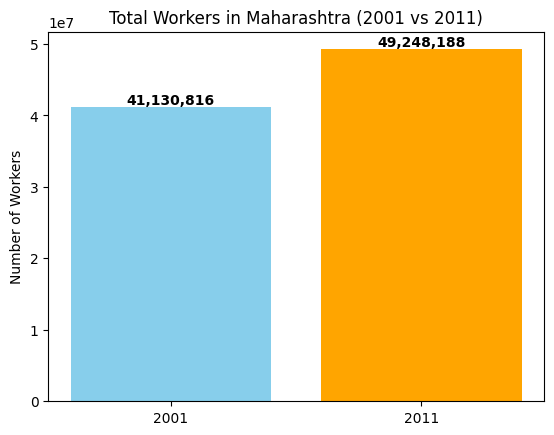

In [829]:
# Total workers (main + marginal) per year
total_2001 = age_workforce_01['Main_Workers_Persons'].sum() + age_workforce_01['Marginal_0_to_6_Persons'].sum()
total_2011 = age_workforce_11['Main_Workers_Persons'].sum() + age_workforce_11['Marginal_0_to_6_Persons'].sum()

print(total_2001)
print(total_2011)

bars = plt.bar(['2001', '2011'], [total_2001, total_2011], color=['skyblue', 'orange'])
plt.title('Total Workers in Maharashtra (2001 vs 2011)')
plt.ylabel('Number of Workers')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

## Worker Composition: 2001 vs 2011
This stacked bar chart shows how the entire population is distributed among:

- Main workers
- Marginal workers
- Non-workers

It allows a proportional comparison between these three categories across the two census years.

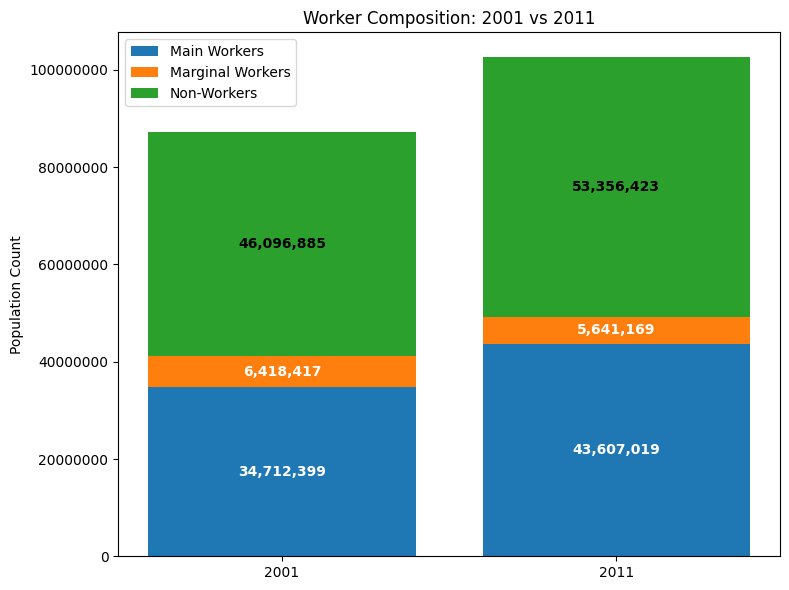

In [840]:
# Combine data by summing relevant fields
main = [age_workforce_01['Main_Workers_Persons'].sum(), age_workforce_11['Main_Workers_Persons'].sum()]
marginal = [age_workforce_01['Marginal_0_to_6_Persons'].sum(), age_workforce_11['Marginal_0_to_6_Persons'].sum()]
non = [age_workforce_01['Non_Workers_Total_Persons'].sum(), age_workforce_11['Non_Workers_Total_Persons'].sum()]
years = ['2001', '2011']

# Plot stacked bars
fig, ax = plt.subplots(figsize=(8, 6))

bars_main = ax.bar(years, main, label='Main Workers')
bars_marginal = ax.bar(years, marginal, bottom=main, label='Marginal Workers')
bars_non = ax.bar(years, non, bottom=[i+j for i,j in zip(main, marginal)], label='Non-Workers')

# Add numbers centered on each segment
for i in range(len(years)):
    ax.text(i, main[i]/2, f'{main[i]:,}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(i, main[i] + marginal[i]/2, f'{marginal[i]:,}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(i, main[i] + marginal[i] + non[i]/2, f'{non[i]:,}', ha='center', va='center', color='black', fontsize=10, fontweight='bold')

# ✅ Disable scientific notation and show plain numbers
ax.ticklabel_format(style='plain', axis='y')
for label in ax.get_yticklabels():
    label.set_fontsize(10)

ax.set_title('Worker Composition: 2001 vs 2011')
ax.set_ylabel('Population Count')
ax.legend()
plt.tight_layout()
plt.show()


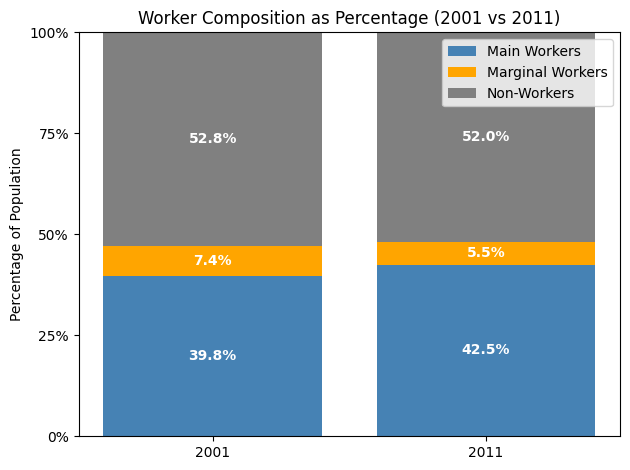

In [831]:
# Step 1: Get raw values
main = [age_workforce_01['Main_Workers_Persons'].sum(), age_workforce_11['Main_Workers_Persons'].sum()]
marginal = [age_workforce_01['Marginal_0_to_6_Persons'].sum(), age_workforce_11['Marginal_0_to_6_Persons'].sum()]
non = [age_workforce_01['Non_Workers_Total_Persons'].sum(), age_workforce_11['Non_Workers_Total_Persons'].sum()]
years = ['2001', '2011']

# Step 2: Convert to percentages
totals = [main[i] + marginal[i] + non[i] for i in range(2)]
main_pct = [main[i] / totals[i] for i in range(2)]
marginal_pct = [marginal[i] / totals[i] for i in range(2)]
non_pct = [non[i] / totals[i] for i in range(2)]

# Step 3: Plot normalized stacked bar chart
bars_main = plt.bar(years, main_pct, label='Main Workers', color='steelblue')
bars_marginal = plt.bar(years, marginal_pct, bottom=main_pct, label='Marginal Workers', color='orange')
bars_non = plt.bar(years, non_pct, bottom=[main_pct[i] + marginal_pct[i] for i in range(2)], label='Non-Workers', color='gray')

# Step 4: Add percentage labels in center of bars
for i in range(2):
    plt.text(i, main_pct[i]/2, f'{main_pct[i]*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    plt.text(i, main_pct[i] + marginal_pct[i]/2, f'{marginal_pct[i]*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    plt.text(i, main_pct[i] + marginal_pct[i] + non_pct[i]/2, f'{non_pct[i]*100:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Formatting
plt.title('Worker Composition as Percentage (2001 vs 2011)')
plt.ylabel('Percentage of Population')
plt.ylim(0, 1)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.legend()
plt.tight_layout()
plt.show()


### Gender Disparity in Workforce (2001 vs 2011)

This grouped bar chart compares male and female participation in three categories—Main Workers, Marginal Workers, and Non-Workers—for Maharashtra in 2001 and 2011. It shows:

* Total counts of males and females in each category for both years.
* Gender gaps in workforce participation.
* Changes in male and female workforce distribution over the decade.

The color-coded bars make it easy to compare gender differences within and across years.


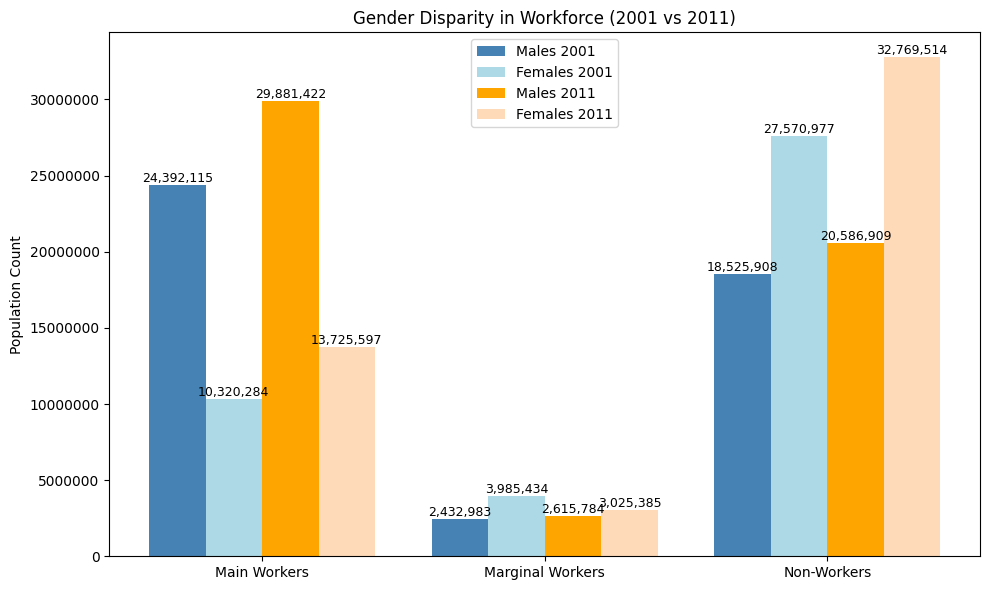

In [832]:

# Existing plotting logic
fig, ax = plt.subplots(figsize=(10,6))

# Plot bars
bars_male_01 = ax.bar(x - width*1.5, male_01, width, label='Males 2001', color='steelblue')
bars_female_01 = ax.bar(x - width/2, female_01, width, label='Females 2001', color='lightblue')
bars_male_11 = ax.bar(x + width/2, male_11, width, label='Males 2011', color='orange')
bars_female_11 = ax.bar(x + width*1.5, female_11, width, label='Females 2011', color='peachpuff')

# Add labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', 
                ha='center', va='bottom', fontsize=9)

for bars in [bars_male_01, bars_female_01, bars_male_11, bars_female_11]:
    add_labels(bars)

# Axis and labels
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Population Count')
ax.set_title('Gender Disparity in Workforce (2001 vs 2011)')
ax.legend()

# ✅ Format Y-axis with plain numbers (disable scientific notation)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


### Age Group Workforce Composition (2001 & 2011)

- This line plot shows the distribution of **Main Workers**, **Marginal Workers**, and **Non-Workers** across different age groups for the years 2001 and 2011.
- It helps identify which age groups contribute most to each workforce category and observe changes over the decade.


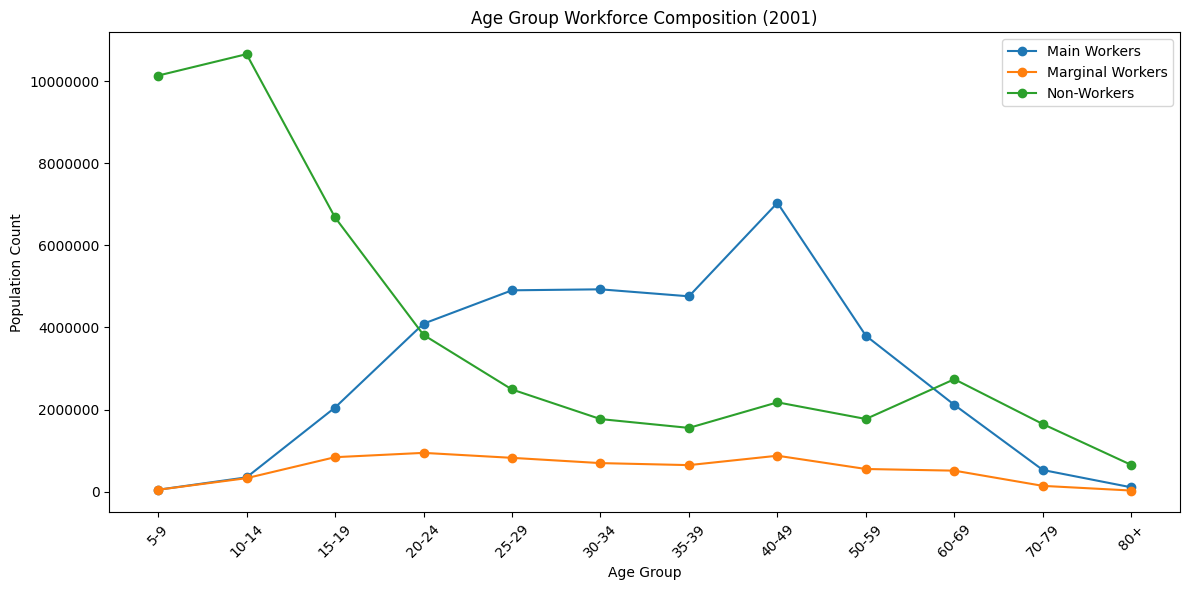

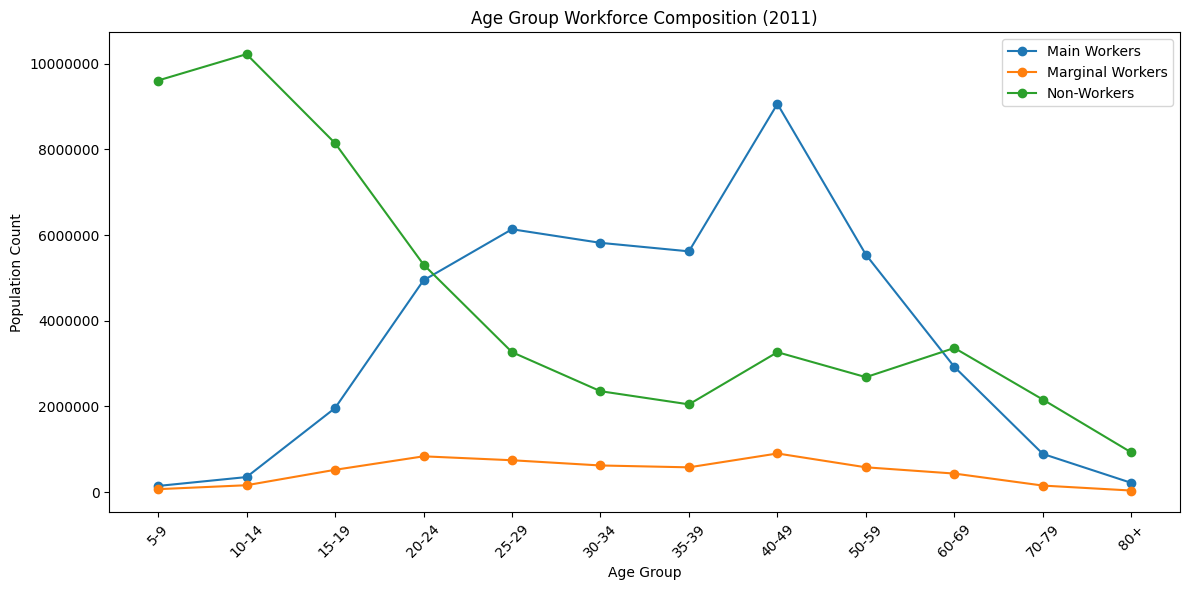

In [843]:
from matplotlib.ticker import ScalarFormatter

# Get the LabelEncoder used for Age_Group in 2011
le_age_11 = encoders['Age_Group_11']

# Get the encoded and decoded labels
encoded_age_groups = age_workforce_11['Age_Group'].unique()
decoded_age_groups = le_age_11.inverse_transform(encoded_age_groups)

# Sort using custom function that handles "80+"
def extract_start_age(label):
    if '+' in label:
        return int(label.replace('+', ''))
    else:
        return int(label.split('-')[0])

# Pair and sort
age_pairs = list(zip(encoded_age_groups, decoded_age_groups))
age_pairs_sorted = sorted(age_pairs, key=lambda x: extract_start_age(x[1]))

# Unzip
encoded_age_groups_sorted, decoded_age_groups_sorted = zip(*age_pairs_sorted)

# Plotting function
def plot_age_group(df, year, encoded_sorted, decoded_sorted):
    main = df.groupby('Age_Group')['Main_Workers_Persons'].sum().reindex(encoded_sorted)
    marginal = df.groupby('Age_Group')['Marginal_0_to_6_Persons'].sum().reindex(encoded_sorted)
    non = df.groupby('Age_Group')['Non_Workers_Total_Persons'].sum().reindex(encoded_sorted)

    plt.figure(figsize=(12,6))
    plt.plot(decoded_sorted, main, marker='o', label='Main Workers')
    plt.plot(decoded_sorted, marginal, marker='o', label='Marginal Workers')
    plt.plot(decoded_sorted, non, marker='o', label='Non-Workers')
    plt.xticks(rotation=45)
    plt.title(f'Age Group Workforce Composition ({year})')
    plt.xlabel('Age Group')
    plt.ylabel('Population Count')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')

    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for both years using sorted age groups
plot_age_group(age_workforce_01, 2001,
               *zip(*sorted(
                   [(x, encoders['Age_Group_01'].inverse_transform([x])[0]) for x in age_workforce_01['Age_Group'].unique()],
                   key=lambda x: extract_start_age(x[1])
               )))

plot_age_group(age_workforce_11, 2011, encoded_age_groups_sorted, decoded_age_groups_sorted)


### Workforce Categories by Rural and Urban Areas (2011)

This bar plot compares the population counts across different workforce categories —

- **Main Workers**
- **Marginal Workers**
- **Non-Workers**
- **Non-Workers Seeking Work**

— separately for rural and urban areas in 2011.

It highlights differences in employment patterns and job-seeking behavior between rural and urban populations.


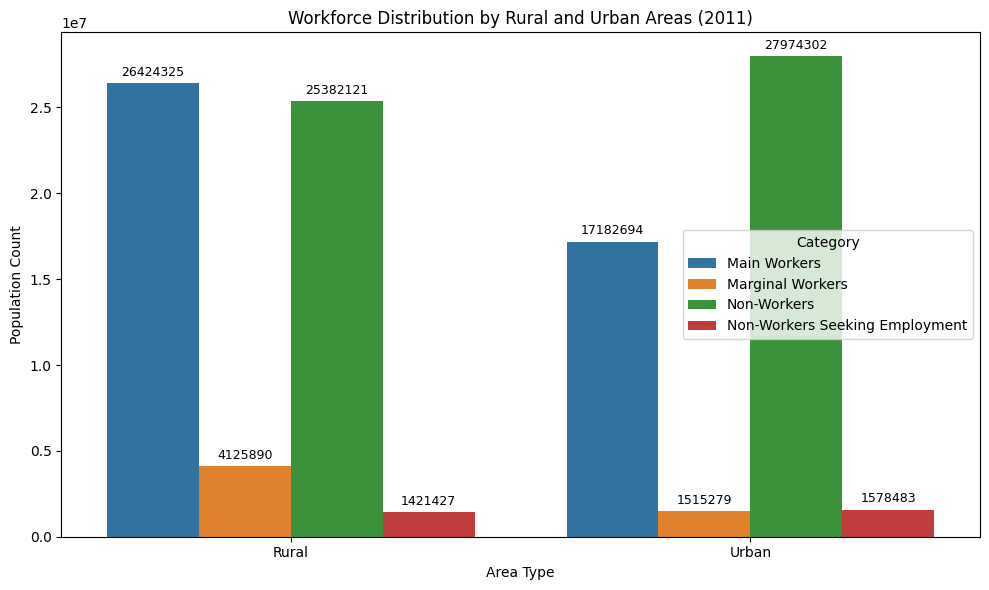

In [835]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_melt, x='Total_Rural_Urban', y='Count', hue='Category')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3)

plt.title('Workforce Distribution by Rural and Urban Areas (2011)')
plt.xlabel('Area Type')
plt.ylabel('Population Count')
plt.tight_layout()
plt.show()
